In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.2/487.2 kB 654.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 16.3 MB

In [3]:
from pycaret.datasets import get_data
data = get_data('pycaret_downloads')

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


<AxesSubplot:>

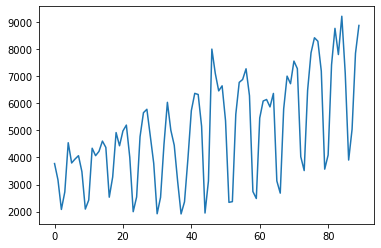

In [4]:
data['Total'].plot()

In [11]:
import pandas as pd
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Date     datetime64[ns]
Total             int64
dtype: object

In [13]:
data.set_index('Date', drop = True, inplace=True)

In [14]:
data.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


<AxesSubplot:xlabel='Date'>

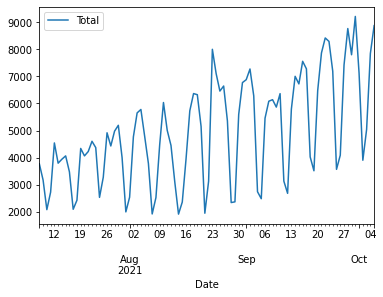

In [15]:
data.plot()

In [16]:
from pycaret.utils import version
version()

'3.0.0.rc4'

In [17]:
from pycaret.time_series import *
s = setup(data, fold =3, fh =12, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [18]:
from pycaret.time_series import TSForecastingExperiment
s1 = TSForecastingExperiment()

In [19]:
type(s1)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [20]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,4960.366667
3,Summary,Statistics,Transformed,Median,,4776.5
4,Summary,Statistics,Transformed,Standard Deviation,,1939.000116
5,Summary,Statistics,Transformed,Variance,,3759721.448315
6,Summary,Statistics,Transformed,Kurtosis,,-0.920113
7,Summary,Statistics,Transformed,Skewness,,0.22622
8,Summary,Statistics,Transformed,# Distinct Values,,89.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932


In [21]:
plot_model()

In [22]:
plot_model(plot = 'train_test_split')

In [23]:
plot_model(plot = 'cv')

In [24]:
plot_model(plot = 'acf')

In [25]:
plot_model(plot = 'diagnostics')

In [26]:
?plot_model

Signature:
plot_model(
    estimator: Union[Any, NoneType] = None,
    plot: Union[str, NoneType] = None,
    return_fig: bool = False,
    return_data: bool = False,
    verbose: bool = False,
    display_format: Union[str, NoneType] = None,
    data_kwargs: Union[Dict, NoneType] = None,
    fig_kwargs: Union[Dict, NoneType] = None,
    save: Union[str, bool] = False,
) -> Union[Tuple[str, list], NoneType]
Docstring:
This function analyzes the performance of a trained model on holdout set.
When used without any estimator, this function generates plots on the
original data set. When used with an estimator, it will generate plots on
the model residuals.


Example
--------
>>> from pycaret.datasets import get_data
>>> airline = get_data('airline')
>>> from pycaret.time_series import *
>>> exp_name = setup(data = airline,  fh = 12)
>>> plot_model(plot="diff", data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True})
>>> plot_model(plot="diff", data_kwargs={"lags_list": [[1], [1, 12]]

In [27]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2749,1.1369,732.7092,894.2025,0.1550,0.1516,0.7334,0.0600
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.4867
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3704,1.3090,739.3816,924.4471,0.1323,0.1399,0.7347,0.0967
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.2733
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.0833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.0800
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.0800
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.3533
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4344,1.3449,781.4699,966.2466,0.1430,0.1478,0.7144,0.0833
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309,0.1467


Processing:   0%|          | 0/125 [00:00<?, ?it/s]

In [29]:
?compare_models

Signature:
compare_models(
    include: Union[List[Union[str, Any]], NoneType] = None,
    exclude: Union[List[str], NoneType] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'MASE',
    n_select: int = 1,
    budget_time: Union[float, NoneType] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Union[dict, NoneType] = None,
    engine: Union[Dict[str, str], NoneType] = None,
    verbose: bool = True,
    parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None,
)
Docstring:
This function trains and evaluates performance of all estimators available in the
model library using cross validation. The output of this function is a score grid
with average cross validated scores. Metrics evaluated during CV can be accessed
using the ``get_metrics`` function. Custom metrics can be added or removed using
``add_metric`` and ``remove_metric`` function.


Example
-

In [30]:
best

ThetaForecaster(sp=7)

In [31]:
best.get_params()

{'deseasonalize': True, 'initial_level': None, 'sp': 7}

In [32]:
predict_model(best, fh =24)

,y_pred
2021-09-24,7111.4964
2021-09-25,3578.8096
2021-09-26,4123.7043
2021-09-27,7779.4459
2021-09-28,8493.7955
2021-09-29,8468.0194
2021-09-30,8467.1125
2021-10-01,7243.3989
2021-10-02,3645.0132
2021-10-03,4199.7866


In [33]:
final_best = finalize_model(best)

In [34]:
predict_model(final_best, fh =24)

,y_pred
2021-10-06,8969.4865
2021-10-07,9062.5373
2021-10-08,7681.8248
2021-10-09,3884.6712
2021-10-10,4463.8040
2021-10-11,8384.5546
2021-10-12,9199.1432
2021-10-13,9150.0046
2021-10-14,9244.4052
2021-10-15,7835.5437


In [35]:
plot_model(best, plot = 'forecast')

In [38]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh':36})

In [39]:
plot_model(best, plot = 'insample')

In [40]:
arima =create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.5825,2.8398,1181.7587,1579.3725,0.2065,0.2419,0.3673
1,2021-08-30,0.7835,0.6025,505.7363,583.4328,0.0913,0.0947,0.8690
2,2021-09-11,1.4576,1.2129,904.2588,1104.9126,0.1336,0.1465,0.6375
Mean,NaT,1.6079,1.5517,863.9179,1089.2393,0.1438,0.1610,0.6246
SD,NaT,0.7421,0.9443,277.4552,406.7417,0.0476,0.0609,0.2050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.4808,2.7309,1135.2358,1518.8188,0.1999,0.2320,0.4149
1,2021-08-30,0.9334,0.7465,602.4804,722.8592,0.1147,0.1078,0.7989
2,2021-09-11,0.8700,0.7371,539.7186,671.4547,0.0841,0.0884,0.8661
Mean,NaT,1.4281,1.4048,759.1449,971.0442,0.1329,0.1427,0.6933
SD,NaT,0.7449,0.9377,267.1679,387.9032,0.0490,0.0636,0.1988


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished


In [42]:
blender = blend_models([arima, tuned_arima])

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.5271,2.7846,1156.4085,1548.6594,0.2029,0.2366,0.3916
1,2021-08-30,0.8510,0.6177,549.2886,598.1511,0.1013,0.1001,0.8623
2,2021-09-11,1.1283,0.9568,699.9841,871.5907,0.1053,0.1132,0.7744
Mean,NaT,1.5022,1.4530,801.8937,1006.1337,0.1365,0.1500,0.6761
SD,NaT,0.7335,0.9517,258.1186,399.5355,0.0470,0.0615,0.2043


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [43]:
save_model(best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ThetaForecaster(sp=7), 'my_best_model.pkl')

In [44]:
l = load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


In [45]:
l

ThetaForecaster(sp=7)